<a href="https://colab.research.google.com/github/jakecho1108/Project-2/blob/main/Project2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('/content/adult.csv')
df.head()
df = df.drop_duplicates()
df=df.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'workclass', 'education', 'occupation', 'relationship', 'marital-status'], axis =1)

#Remove unnecessary data
df.head()

,age,educational-num,race,gender,hours-per-week,native-country,income
0,25,7,Black,Male,40,United-States,<=50K
1,38,9,White,Male,50,United-States,<=50K
2,28,12,White,Male,40,United-States,>50K
3,44,10,Black,Male,40,United-States,>50K
4,18,10,White,Female,30,United-States,<=50K


## Cleaning / Getting ready

In [57]:
df['age'].value_counts()
df['educational-num'].value_counts()
df['race'].value_counts()
df['gender'].value_counts()
df['hours-per-week'].value_counts()
df['native-country'].value_counts()
df = df.loc[df['native-country'] == 'United-States']
df = df.replace({'<=50K': 0, '>50K': 1})
df = df.replace({'Male': 0, 'Female': 1})
df = df.replace({'United-States': 0})
df=df.drop(['native-country'], axis =1)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
y = df['income']
X = df.drop(['income'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_encoder.fit(train_cat_data)
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
num_selector = make_column_selector(dtype_include='number')
train_ohe=pd.DataFrame(train_ohe)
test_ohe=pd.DataFrame(test_ohe)

train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed
new_column_names = {0: 'Race1', 1: 'Race2', 2: 'Race3', 3: 'Race4', 4: 'Race5',}
X_test_processed = X_test_processed.rename(columns=new_column_names)
X_train_processed = X_train_processed.rename(columns=new_column_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
scaler = StandardScaler()

# apply PCA
pca = PCA(n_components=0.95, random_state=42)


In [60]:
import matplotlib.pyplot as plt
from seaborn import heatmap
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(5, 5))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=10)
  plt.ylabel('True', fontsize=10)
  plt.show()

## Modeling

In [61]:
from sklearn.neighbors import KNeighborsClassifier
# Without PCA
knn = KNeighborsClassifier()

# Now we will build the pipeline
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.85      0.92      0.88     24844
           1       0.67      0.50      0.58      8000

    accuracy                           0.82     32844
   macro avg       0.76      0.71      0.73     32844
weighted avg       0.81      0.82      0.81     32844

Test Report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86      8260
           1       0.57      0.42      0.48      2688

    accuracy                           0.78     10948
   macro avg       0.70      0.66      0.67     10948
weighted avg       0.76      0.78      0.77     10948



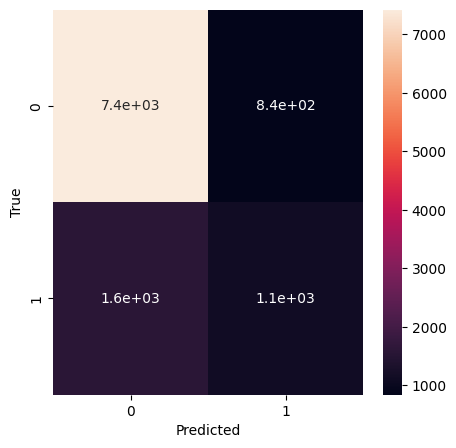

In [62]:
# evaluate the pipeline
eval_classification(knn_pipe, X_train_processed, X_test_processed, y_train, y_test)

First model is KNN without PCA. Precision is 0.57 and accuracy is 0.78.

In [63]:
# Now we will build the pipeline
knn_pca_pipe = make_pipeline(scaler, pca, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.86      0.91      0.88     24844
           1       0.66      0.53      0.59      8000

    accuracy                           0.82     32844
   macro avg       0.76      0.72      0.73     32844
weighted avg       0.81      0.82      0.81     32844

Test Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8260
           1       0.57      0.45      0.50      2688

    accuracy                           0.78     10948
   macro avg       0.70      0.67      0.68     10948
weighted avg       0.77      0.78      0.77     10948



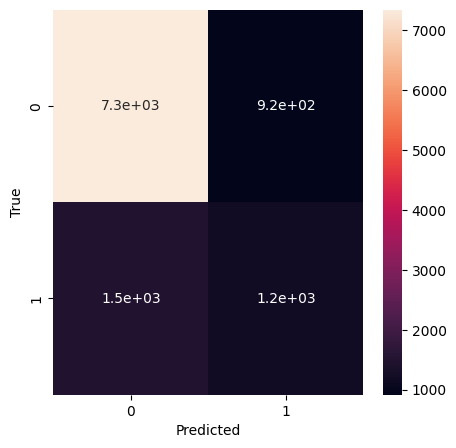

In [64]:
# evaluate the pipeline

eval_classification(knn_pca_pipe, X_train_processed, X_test_processed, y_train, y_test)

Second model is KNN with PCA. Precision is 0.57 and accuracy is 0.78. Both values didn't change. This might mean that PCA isn't effective, which makes sense due to low amount of variables.

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Without PCA
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(scaler, dt)

dt_pipe.fit(X_train_processed, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.91     24844
           1       0.81      0.58      0.68      8000

    accuracy                           0.86     32844
   macro avg       0.84      0.77      0.79     32844
weighted avg       0.86      0.86      0.86     32844

Test Report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86      8260
           1       0.57      0.41      0.48      2688

    accuracy                           0.78     10948
   macro avg       0.70      0.65      0.67     10948
weighted avg       0.76      0.78      0.77     10948



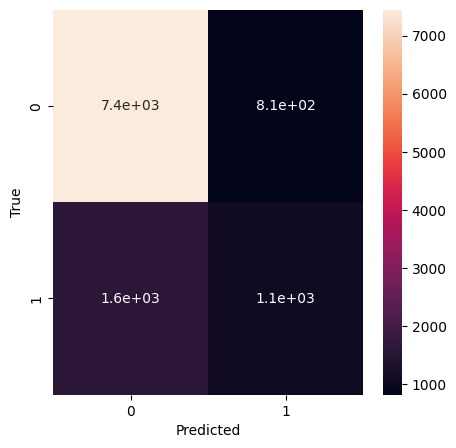

In [66]:
# evaluate the pipeline
eval_classification(dt_pipe, X_train_processed, X_test_processed, y_train, y_test)

Third model is Decision Tree without PCA. Precision is 0.58 and accuracy is 0.78. Precision score is tiny bit better.

In [67]:
# Now we will build the pipeline
dt_pca_pipe = make_pipeline(scaler, pca, dt)

# fit the pipeline
dt_pca_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.91     24844
           1       0.81      0.58      0.68      8000

    accuracy                           0.86     32844
   macro avg       0.84      0.77      0.79     32844
weighted avg       0.86      0.86      0.86     32844

Test Report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86      8260
           1       0.57      0.41      0.48      2688

    accuracy                           0.78     10948
   macro avg       0.70      0.66      0.67     10948
weighted avg       0.76      0.78      0.77     10948



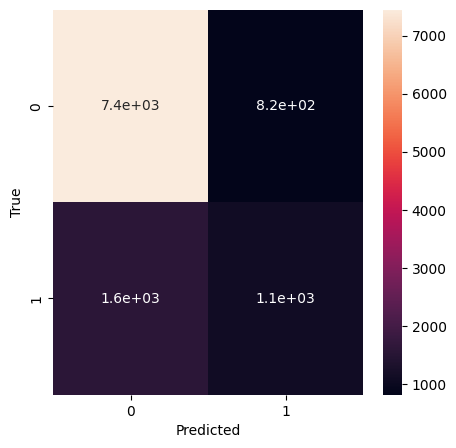

In [68]:
# evaluate the pipeline
eval_classification(dt_pca_pipe, X_train_processed, X_test_processed, y_train, y_test)

Decision Tree with PCA. Precision is 0.58 and accuracy is 0.78. Again, PCA did not have an impact on the precision and had a very tiny impact on the accuracy. This shows PCA was not necessary for this situation.

In [69]:
from sklearn.model_selection import GridSearchCV
knn_grid = {'pca__n_components':[.5, .7, .9, None],
            'kneighborsclassifier__n_neighbors':[1, 5, 10, 20]}

knn_grid = GridSearchCV(knn_pca_pipe, param_grid=knn_grid, cv=3)

Train Report:               precision    recall  f1-score   support

           0       0.84      0.93      0.88     24844
           1       0.68      0.43      0.53      8000

    accuracy                           0.81     32844
   macro avg       0.76      0.68      0.71     32844
weighted avg       0.80      0.81      0.80     32844

Test Report:               precision    recall  f1-score   support

           0       0.83      0.93      0.87      8260
           1       0.64      0.40      0.49      2688

    accuracy                           0.80     10948
   macro avg       0.73      0.66      0.68     10948
weighted avg       0.78      0.80      0.78     10948



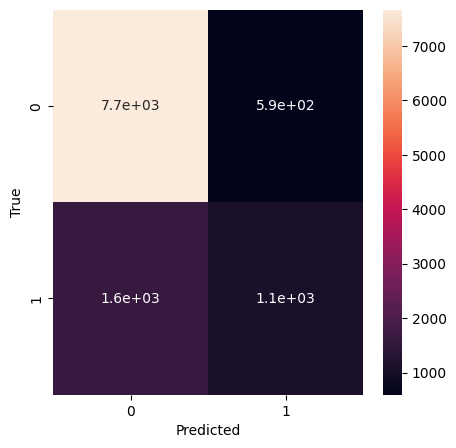

In [70]:
knn_grid.fit(X_train_processed, y_train)

eval_classification(knn_grid, X_train_processed, X_test_processed, y_train, y_test)

KNN with GridsearchCV. Optimizing with GridSearchCV improved the model. Precision is 0.64 and accuracy is 0.80. This is a significant improvement from KNN and KNN w/ PCA. 

In [71]:
dt_pca_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA(n_components=0.95, random_state=42)),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=0.95, random_state=42),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decr

In [72]:
dt_grid = {'pca__n_components':[.5, .7, .9, None],
           'decisiontreeclassifier__max_depth': [2,4,6,8,10,12]}

dt_grid = GridSearchCV(dt_pca_pipe, param_grid=dt_grid, cv=3)

Train Report:               precision    recall  f1-score   support

           0       0.82      0.94      0.88     24844
           1       0.67      0.37      0.48      8000

    accuracy                           0.80     32844
   macro avg       0.74      0.66      0.68     32844
weighted avg       0.78      0.80      0.78     32844

Test Report:               precision    recall  f1-score   support

           0       0.82      0.94      0.88      8260
           1       0.67      0.37      0.48      2688

    accuracy                           0.80     10948
   macro avg       0.75      0.66      0.68     10948
weighted avg       0.78      0.80      0.78     10948



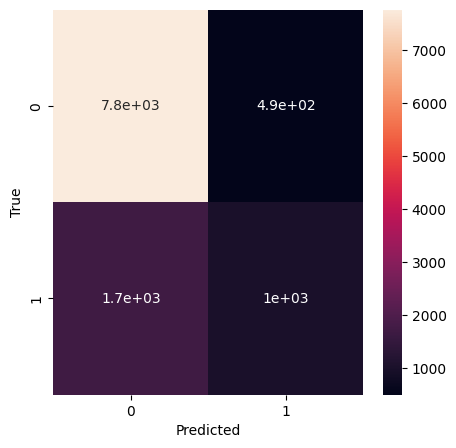

In [73]:
dt_grid.fit(X_train_processed, y_train)

eval_classification(dt_grid, X_train_processed, X_test_processed, y_train, y_test)

Decision Tree with GridsearchCV. Optimizing with GridSearchCV helped increase precision to 0.67 and accuracy to 0.8. This is the best model among the Decision Trees. 

## Conclusion

Out of all the models, the best one is Decision Tree with GridSearchCV. It had the highest accuracy and highest precision score. For cases like this, ability to get the true positives is the most important factor therefore, I value the precision score the most.
